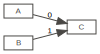

In [1]:
import graphcat.notebook

graph = graphcat.StaticGraph()
graph.add_task("A", graphcat.constant("a"))
graph.add_task("B", graphcat.constant("b"))
graph.add_task("C", graphcat.passthrough(input=0))
graph.add_links("A", ("C", 0))
graph.add_links("B", ("C", 1))

graphcat.notebook.display(graph)

C output: a


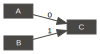

In [2]:
print("C output:", graph.output("C"))
graphcat.notebook.display(graph)

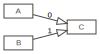

In [3]:
graph = graphcat.DynamicGraph()
graph.add_task("A", graphcat.constant("a"))
graph.add_task("B", graphcat.constant("b"))
graph.add_task("C", graphcat.passthrough(input=0))
graph.add_links("A", ("C", 0))
graph.add_links("B", ("C", 1))

graphcat.notebook.display(graph)

C output: a


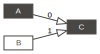

In [4]:
print("C output:", graph.output("C"))
graphcat.notebook.display(graph)

... but task "B" hasn't executed, because it isn't needed *in this case*.  If we were to change task "C" so that it uses its second input, the output from "B" will be computed:

C output: b


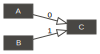

In [5]:
graph.set_task("C", graphcat.passthrough(input=1))
print("C output:", graph.output("C"))
graphcat.notebook.display(graph)

Given that dynamic graphs are potentially more efficient by eliminating unneeded computation, why have static graphs at all?  This is because dynamic graphs use more resources to run, and may exceed the Python interpreter stack limits on large, complex graphs.  In those cases you can increase the maximum stack size, or switch back to static graphs, which may waste some computation, but can never run out of stack space.